# Assignment 6 
## name : rocky kim 
## student id : 20152424
## github link : https://github.com/Epicevent/assignment06 

# We are given data 
## $$ noisy\_x =(x_1 ,x_2 ,\cdots,x_N )= (-100,-99,\cdots,99,100) $$
## $$ noisy\_y =(y_1 ,y_2, \cdots , y_N )$$

# Make Noisy Data by given code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

num     = 201
std     = 20
a       = 2 
b       = 10

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
noisy_y      = a * x + nn * std + b # noisy data

# visualize noisy data 

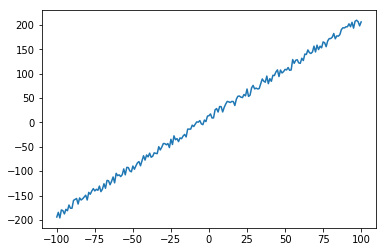

In [2]:
fig0 = plt.figure()
plt.plot(x,noisy_y)# plot noisy
plt.show()

# Mathematic model for line fitting 

$$
   A=
  \left[ {\begin{array}{ccccc}
   1 & x_1 \\
   1 & x_2 \\
   \vdots & \vdots \\
   1 & x_n 
  \end{array} } \right]
$$
  
$$
  b=  \left[ {\begin{array}{ccccc}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n 
  \end{array} } \right]
$$



# We want to get $\theta_1$, $\theta_2$ that minimize 

$$ \| A
   \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2
  \end{array} } \right] - b   \|^2
$$



# Solution of the least square problem 

$$
   \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2
  \end{array} } \right]=(A^T A)^{-1}A^Tb 
$$

In [3]:
# MakeArray A
# I will use this method : below 
# >>> a = np.array((1,2,3))
# >>> b = np.array((2,3,4))
# >>> np.column_stack((a,b))
# array([[1, 2],
#        [2, 3],
#        [3, 4]])

a1 = np.ones(num) # first column of A

A = np.column_stack((a1,x))
ATA =np.matmul(A.T, A)
invATA = inv(ATA)
C = np.matmul(invATA, A.T)# C Matmul noise_ = theta_1, theta_2

# Caculate 

$$ \| A
   \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2
  \end{array} } \right] - b   \|^2
$$

# and

$$
\theta_1,\theta_2
$$

In [4]:
numdata = np.shape(noisy_y)[0]
transposednoisy_y = noisy_y.reshape((numdata, 1))
thetavector = np.matmul(C,transposednoisy_y )
# thetavector = np.array([10,2]).reshape(2,1) 
theEnergy = np.matmul(((np.matmul(A,thetavector))-transposednoisy_y).T,
                      ((np.matmul(A,thetavector))-transposednoisy_y))
print(theEnergy)

[[5981.50850717]]


In [5]:
print("theta_1 = " +str(thetavector[0][0])+"\ntheta_2 = " + str(thetavector[1][0])) # print the solution

theta_1 = 9.999999999999993
theta_2 = 2.008331190580927


# Caculate clean data and  plot clean data 

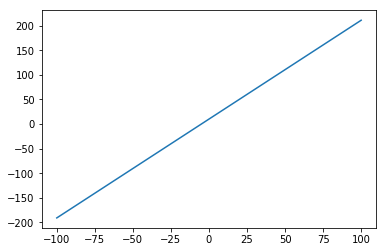

In [6]:
clean_y =(np.matmul(A,thetavector)).reshape(-1,)  # clean
fig1 = plt.figure(1)
plt.plot(x, clean_y)
plt.show()


CLEAN DATA 

# draw line that fits the noisy data

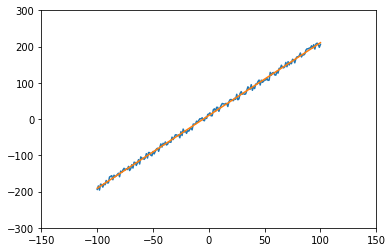

In [7]:
px = [-100 ,100]
py = [clean_y[0] , clean_y[200]]
fig2 = plt.figure(2)
plt.plot(x,noisy_y)# noisy
plt.xlim(-150, 150), plt.ylim(-300, 300)
plt.plot(px,py ) #line fit
plt.show()

